# <div style="text-align: center; background-color: #E50914; font-family: Lobster;color: black; padding: 14px; line-height: 1;border-radius:14px"> Netflix Stock Price Prediction 🎞️</div>

<div style="width:100%;text-align:center"> 
<img align=middle src = "https://blog.tipranks.com/wp-content/uploads/2025/01/nflx-1-750x406.jpg" width="600px">
</div>

# <div style="text-align: center; background-color: white; font-family: Lobster;color: black; padding: 14px; line-height: 1;border-radius:14px"> Introduction 🎞️</div>

#####  The Dataset contains data for 5 years ie. from 5th Feb 2018 to 5th Feb 2022

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.

### Goal: 
The primary goal is to predict Netflix's future stock prices using historical data. By building a predictive model, we aim to identify trends, fluctuations, and patterns in Netflix’s stock performance, enabling investors and analysts to make more informed decisions about buying, holding, or selling shares. 

# <div style="text-align: center; background-color: white; font-family: Lobster;color: black; padding: 14px; line-height: 1;border-radius:14px"> About Dataset 🪄</div>

The dataset titled "Netflix Stock Price Prediction" is designed for time series analysis and forecasting of Netflix's stock prices. Here are the key details about the dataset:

1. **Dataset Overview:**
   - **Content:** The Dataset contains data for 5 years ie. from 5th Feb 2018 to 5th Feb 2022
   - **Features:** It includes 7 columns:
     - **Date:** Indicates the trading day.
     - **Open:** The opening stock price of Netflix on that day.
     - **High:** The highest price recorded during the trading day.
     - **Low:** The lowest price reached during the day.
     - **Close:** The closing price, adjusted for any stock splits.
     - **Adj Close:** The closing price further adjusted for splits, dividends, and capital gains.
     - **Volume:** The total number of Netflix shares traded on that particular day.

2. **Usage and Relevance:**
   - **Usability:** Rated at 10.00, indicating high usability for business and investment analysis.
   - **Tags:** Tagged with "Business," "Investing," "Intermediate," "Time Series Analysis," "Python," and "LSTM," suggesting its relevance in financial forecasting using Python and LSTM models.
   - **License:** Public Domain (CC0), allowing for unrestricted use and distribution.

3. **Expected Update Frequency:** Never updated, indicating that the dataset covers a fixed time period without ongoing updates.

4. **Data Exploration and Analysis:**
   - The dataset provides insights into Netflix's stock price movements over time, essential for building predictive models and understanding market trends.
   - Ideal for exploring techniques in time series forecasting, such as LSTM (Long Short-Term Memory) models, commonly used for capturing temporal dependencies in sequential data like stock prices.

5. **Additional Information:**
   - **File Size:** 74.93 kB
   - **Downloads:** 16K in the last 30 days, indicating active interest and usage.

This dataset is valuable for researchers, analysts, and data scientists interested in financial forecasting and time series analysis, particularly within the context of stock market prediction using historical data.

# <div style="text-align: center; background-color: #E50914; font-family: Lobster;color: black; padding: 14px; line-height: 1;border-radius:14px"> I. Import Libraries📚</div>

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, mean,expr, avg, stddev
from pyspark.sql.functions import lag, coalesce, lit
from pyspark.sql.functions import to_date, date_format
from pyspark.sql.window import Window

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# <div style="text-align: center; background-color: #E50914; font-family: Lobster;color: black; padding: 14px; line-height: 1;border-radius:14px"> II. Data Investigation and Pre-processing 📚</div>

In [2]:
# Create a SparkSession

spark = SparkSession.builder \
    .appName("Netflix Stock Price Forecasting") \
    .getOrCreate()
    
data_path = r"C:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\data\raw\NFLX.csv"    
# Load the data
df = spark.read.csv(data_path, header=True, inferSchema=True)
df.show(5)

+----------+----------+----------+----------+----------+----------+--------+
|      Date|      Open|      High|       Low|     Close| Adj Close|  Volume|
+----------+----------+----------+----------+----------+----------+--------+
|2018-02-05|     262.0|267.899994|250.029999|254.259995|254.259995|11896100|
|2018-02-06|247.699997|266.700012|     245.0|265.720001|265.720001|12595800|
|2018-02-07|266.579987|272.450012|264.329987|264.559998|264.559998| 8981500|
|2018-02-08|267.079987|267.619995|     250.0|250.100006|250.100006| 9306700|
|2018-02-09|253.850006|255.800003|236.110001|249.470001|249.470001|16906900|
+----------+----------+----------+----------+----------+----------+--------+
only showing top 5 rows



In [3]:
df.printSchema()
print(f"Rows: {df.count()}, Columns: {len(df.columns)}")

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)

Rows: 1009, Columns: 7


#### Descriptive statistics

In [4]:
df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|              Open|              High|               Low|             Close|         Adj Close|           Volume|
+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|  count|              1009|              1009|              1009|              1009|              1009|             1009|
|   mean|419.05967286223984|425.32070308027744|412.37404380178384| 419.0007329207132| 419.0007329207132| 7570685.03468781|
| stddev|108.53753170401458|109.26295957119454|107.55586739006031|108.28999877034995|108.28999877034995|5465535.225689975|
|    min|        233.919998|        250.649994|        231.229996|        233.880005|        233.880005|          1144000|
|    max|        692.349976|         700.98999|        686.090027|        691.690002|        691.690002|         58904300|
+-------+-------

#### Check the missing value and remove missing value

In [5]:
missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show()
df = df.dropna()

+----+----+----+---+-----+---------+------+
|Date|Open|High|Low|Close|Adj Close|Volume|
+----+----+----+---+-----+---------+------+
|   0|   0|   0|  0|    0|        0|     0|
+----+----+----+---+-----+---------+------+



#### Convert column 'Date' to Timestamp data

In [6]:
# Convert the Date column to Timstamp
df = df.withColumn("Date", col("Date").cast("timestamp"))
# Only show "yyyy-MM-dd" in the Date column
df = df.withColumn("Date", date_format(col("Date"),"yyyy-MM-dd"))

# Order time series data
df = df.orderBy("Date")
df.show(10)

+----------+----------+----------+----------+----------+----------+--------+
|      Date|      Open|      High|       Low|     Close| Adj Close|  Volume|
+----------+----------+----------+----------+----------+----------+--------+
|2018-02-05|     262.0|267.899994|250.029999|254.259995|254.259995|11896100|
|2018-02-06|247.699997|266.700012|     245.0|265.720001|265.720001|12595800|
|2018-02-07|266.579987|272.450012|264.329987|264.559998|264.559998| 8981500|
|2018-02-08|267.079987|267.619995|     250.0|250.100006|250.100006| 9306700|
|2018-02-09|253.850006|255.800003|236.110001|249.470001|249.470001|16906900|
|2018-02-12|252.139999|259.149994|     249.0|257.950012|257.950012| 8534900|
|2018-02-13|257.290009|261.410004|254.699997|258.269989|258.269989| 6855200|
|2018-02-14|260.470001|269.880005|260.329987|     266.0|     266.0|10972000|
|2018-02-15|270.029999|     280.5|267.630005|280.269989|280.269989|10759700|
|2018-02-16|278.730011|281.959991|275.690002|278.519989|278.519989| 8312400|

# <div style="text-align: center; background-color: #E50914; font-family: Lobster;color: black; padding: 14px; line-height: 1;border-radius:14px"> III. Exploratory Data Analysis 🧐</div>

#### Line Plot display closing prices over time

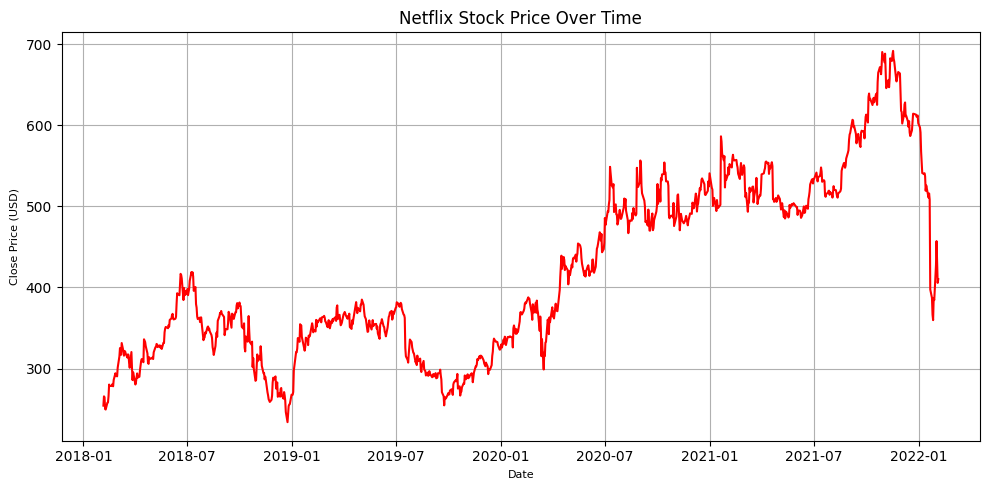

In [7]:
df_1 = df.withColumn("Date", col("Date").cast("timestamp"))
pandas_df = df_1.toPandas()

plt.figure(figsize=(10, 5))
sns.lineplot(x = "Date", y = "Close", data=pandas_df, color='red')
plt.title('Netflix Stock Price Over Time', fontsize=12)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price (USD)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

This is a line graph representing the closing stock price of Netflix over time, beginning from January 2018 until January 2022.

- Target: Understanding the long-term trend of Netflix stock price over the years, identifying periods of significant growh and decline.

- Reason: Evaluate the overall performance of the stock, helping to identify important milestones such as price highs and lows.

  + Strong growth trend in the period 2018-2022. 
  + Strong fluctuations during the Covid-19 period (2019-2020).
  + The drop in price during 2021-2022 suggests a possible turning point in the stock's performance.

### Correlation (Heatmap) between variables

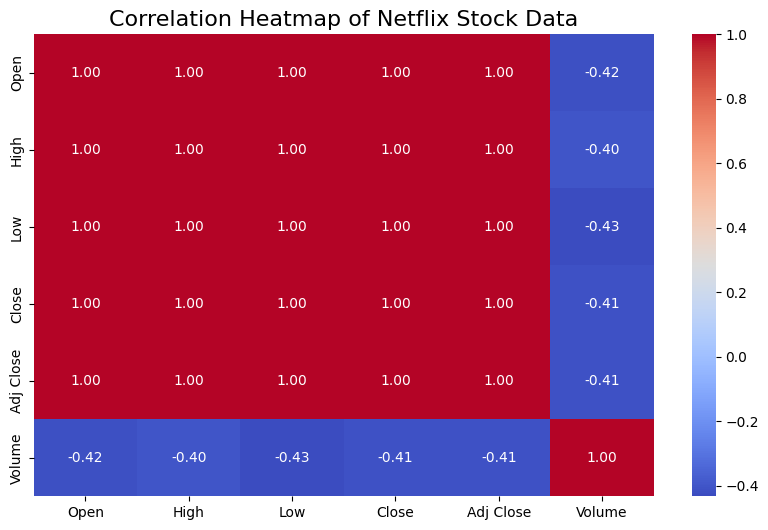

In [8]:
# Correlation heatmap of numeric features only
corr_matrix = pandas_df[['Open', 'High', 'Low', 'Close','Adj Close', 'Volume']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Netflix Stock Data', fontsize=16)
plt.show()

- Correlation HeatMap: Helps in feature selection by eliminating highly correlated variables (avoiding multicollinearity).

- Magnitude of Correlation: The correlation coefficients are very close to 1 (positive correlation) or -1 (negative correlation), indicating a strong linear relationship between the features.

- Key Observations:

  + "Open, High, Low, Close, Adj Close" are highly correlated with each other.

  + "Volume" has a negative correlation with other features. This means that when the stock price increases, the volume tends to decrease, and vice versa.

### Boxplot distributes closing prices by year

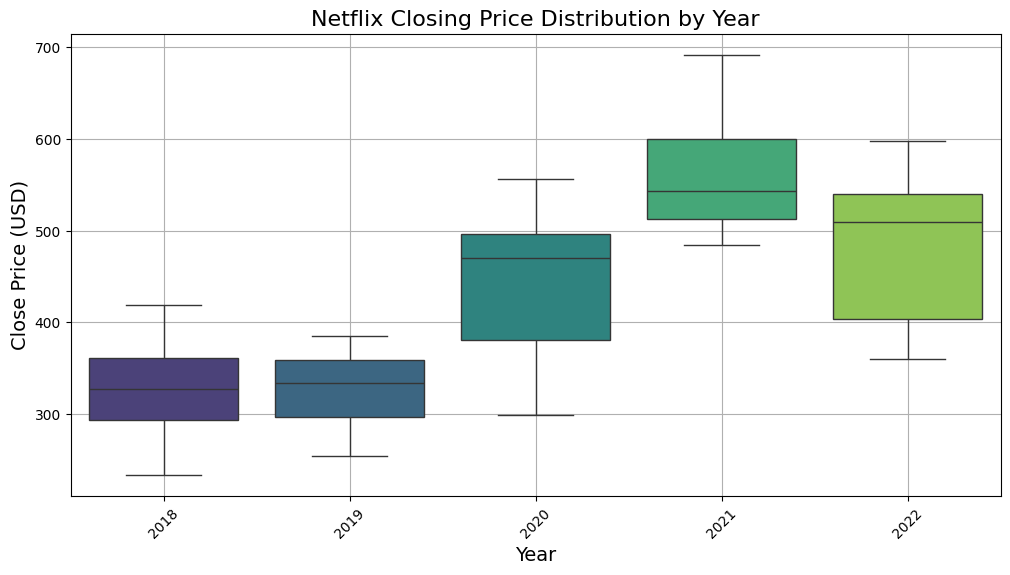

In [9]:
pandas_df['Year'] = pandas_df['Date'].dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Close', data=pandas_df, palette='viridis')
plt.title('Netflix Closing Price Distribution by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The box plot shows the distribution of Netflix closing prices by year from 2018 to 2022.

- 2018: The median closing price is around $340, with a range from $240 to $420.
- 2019: The median closing price is around $350, with a range from $260 to $380.
- 2020: The median closing price is around $480, with a range from $300 to $560.
- 2021: The median closing price is around $540, with a range from $490 to $680.
- 2022: The median closing price is around $520, with a range from $400 to $600.

=> Overall, the box plot shows that Netflix closing prices have generally increased over the years, with the median price rising each year. The range of prices also seems to be increasing, with more volatility in recent years.

### Volume trading symbol over time

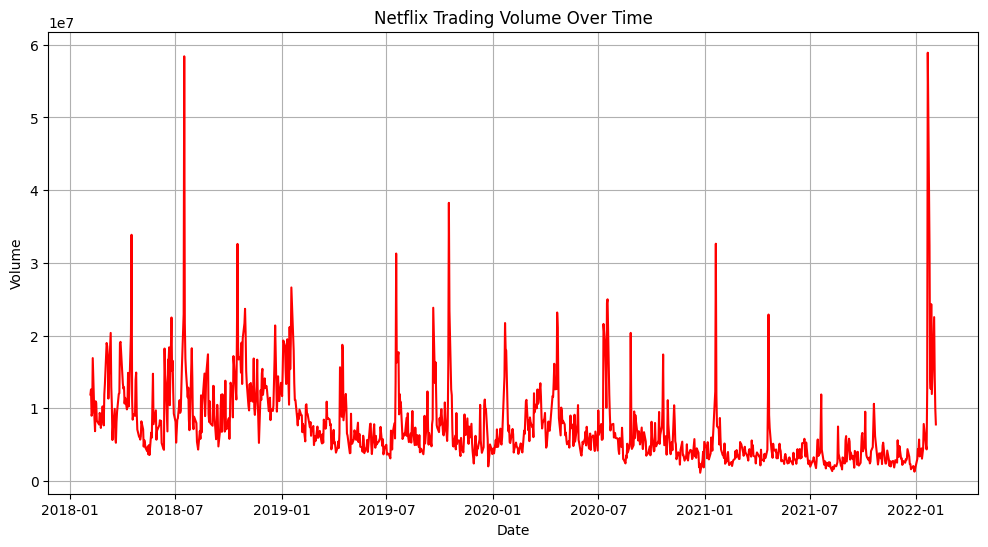

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="Volume", data=pandas_df, color="r")
plt.title("Netflix Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()

- Purpose: Analyze the relationship between trading volume and price volatility.

- Reason for selection: High trading volume is often accompanied by strong price volatility (e.g., company news, market events).

- Key observation:
   + The trading volume fluctuates significantly over time, showing high peaks and troughs.

   + High peaks: Several distinct spikes in trading volume suggest major events or announcements impacting the stock.
"
   + Market Volatility: The fluctuations in trading volume indicate significant market volatility around Netflix



# <div style="text-align: center; background-color: #E50914; font-family: Lobster;color: black; padding: 14px; line-height: 1;border-radius:14px"> IV. Feature Engineering 🔎</div>

### Adjust for Stock Splits and Dividends:

In [11]:
# Check if Close and Adj Close differ significantly
df.select("Date", "Close", "Adj Close").where(col("Close") != col("Adj Close")).show()

# If Adj Close is adjusted, proceed with it
df = df.drop("Close").withColumnRenamed("Adj Close", "Close")

+----+-----+---------+
|Date|Close|Adj Close|
+----+-----+---------+
+----+-----+---------+



In [12]:
df.show(5)

+----------+----------+----------+----------+----------+--------+
|      Date|      Open|      High|       Low|     Close|  Volume|
+----------+----------+----------+----------+----------+--------+
|2018-02-05|     262.0|267.899994|250.029999|254.259995|11896100|
|2018-02-06|247.699997|266.700012|     245.0|265.720001|12595800|
|2018-02-07|266.579987|272.450012|264.329987|264.559998| 8981500|
|2018-02-08|267.079987|267.619995|     250.0|250.100006| 9306700|
|2018-02-09|253.850006|255.800003|236.110001|249.470001|16906900|
+----------+----------+----------+----------+----------+--------+
only showing top 5 rows



##### Daily price range (High - Low)
##### Daily change (Close - Open)

In [13]:
df_features = df.withColumn("Price_Range", col("High") - col("Low")) \
                     .withColumn("Daily_Change", col("Close") - col("Open"))
                     
df_features.show(5)

+----------+----------+----------+----------+----------+--------+------------------+-------------------+
|      Date|      Open|      High|       Low|     Close|  Volume|       Price_Range|       Daily_Change|
+----------+----------+----------+----------+----------+--------+------------------+-------------------+
|2018-02-05|     262.0|267.899994|250.029999|254.259995|11896100| 17.86999499999999|-7.7400049999999965|
|2018-02-06|247.699997|266.700012|     245.0|265.720001|12595800|21.700012000000015|  18.02000400000003|
|2018-02-07|266.579987|272.450012|264.329987|264.559998| 8981500| 8.120024999999998|-2.0199890000000096|
|2018-02-08|267.079987|267.619995|     250.0|250.100006| 9306700|17.619995000000017| -16.97998100000001|
|2018-02-09|253.850006|255.800003|236.110001|249.470001|16906900|19.690001999999993| -4.380005000000011|
+----------+----------+----------+----------+----------+--------+------------------+-------------------+
only showing top 5 rows



### Moving Average (MA)

In [14]:
from pyspark.sql.window import Window
from pyspark.sql.functions import avg

window_10 = Window.orderBy("Date").rowsBetween(-9, 0)  # 10-day window
window_50 = Window.orderBy("Date").rowsBetween(-49, 0)  # 50-day window

df_features = df_features.withColumn("MA_10", avg("Close").over(window_10)) \
                         .withColumn("MA_50", avg("Close").over(window_50))

In [15]:
df_features.show(5)

+----------+----------+----------+----------+----------+--------+------------------+-------------------+------------------+------------------+
|      Date|      Open|      High|       Low|     Close|  Volume|       Price_Range|       Daily_Change|             MA_10|             MA_50|
+----------+----------+----------+----------+----------+--------+------------------+-------------------+------------------+------------------+
|2018-02-05|     262.0|267.899994|250.029999|254.259995|11896100| 17.86999499999999|-7.7400049999999965|        254.259995|        254.259995|
|2018-02-06|247.699997|266.700012|     245.0|265.720001|12595800|21.700012000000015|  18.02000400000003|        259.989998|        259.989998|
|2018-02-07|266.579987|272.450012|264.329987|264.559998| 8981500| 8.120024999999998|-2.0199890000000096| 261.5133313333333| 261.5133313333333|
|2018-02-08|267.079987|267.619995|     250.0|250.100006| 9306700|17.619995000000017| -16.97998100000001|258.65999999999997|258.65999999999997|

### Relative strength index (RSI)

In [16]:
# Calculate daily price change
w = Window.orderBy("Date")
df_features = df_features.withColumn("Price_Diff", col("Close") - lag("Close", 1).over(w))

# Separate gains and losses
df_features = df_features.withColumn("Gain", when(col("Price_Diff") > 0, col("Price_Diff")).otherwise(0)) \
                         .withColumn("Loss", when(col("Price_Diff") < 0, -col("Price_Diff")).otherwise(0))

# 14-day average gain/loss
window_14 = Window.orderBy("Date").rowsBetween(-13, 0)
df_features = df_features.withColumn("Avg_Gain", avg("Gain").over(window_14)) \
                         .withColumn("Avg_Loss", avg("Loss").over(window_14))

# RSI formula: 100 - (100 / (1 + Avg_Gain / Avg_Loss))
df_features = df_features.withColumn("RSI", 100 - (100 / (1 + col("Avg_Gain") / col("Avg_Loss"))))

In [17]:
df_features.show(5)

+----------+----------+----------+----------+----------+--------+------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+
|      Date|      Open|      High|       Low|     Close|  Volume|       Price_Range|       Daily_Change|             MA_10|             MA_50|         Price_Diff|              Gain|              Loss|          Avg_Gain|           Avg_Loss|              RSI|
+----------+----------+----------+----------+----------+--------+------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+
|2018-02-05|     262.0|267.899994|250.029999|254.259995|11896100| 17.86999499999999|-7.7400049999999965|        254.259995|        254.259995|               NULL|               0.0|               0.0|               0.0|       

#### Calculate Boilinger Bands

In [18]:
window_20 = Window.orderBy("Date").rowsBetween(-19, 0)
df_features = df_features.withColumn("MA_20", avg("Close").over(window_20)) \
                         .withColumn("Std_Dev", stddev("Close").over(window_20))

df_features = df_features.withColumn("Upper_BB", col("MA_20") + 2 * col("Std_Dev")) \
                         .withColumn("Lower_BB", col("MA_20") - 2 * col("Std_Dev"))

In [19]:
df_features.show(5)

+----------+----------+----------+----------+----------+--------+------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-----------------+-----------------+------------------+
|      Date|      Open|      High|       Low|     Close|  Volume|       Price_Range|       Daily_Change|             MA_10|             MA_50|         Price_Diff|              Gain|              Loss|          Avg_Gain|           Avg_Loss|              RSI|             MA_20|          Std_Dev|         Upper_BB|          Lower_BB|
+----------+----------+----------+----------+----------+--------+------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-----------------+-----------------+------------------+
|201

### Calculate Stochastic Oscillator

In [20]:
window_14 = Window.orderBy("Date").rowsBetween(-13, 0)
df_features = df_features.withColumn("Lowest_Low", avg("Low").over(window_14)) \
                         .withColumn("Highest_High", avg("High").over(window_14))

df_features = df_features.withColumn("Stoch_Osc", 100 * (col("Close") - col("Lowest_Low")) / (col("Highest_High") - col("Lowest_Low")))

### Clean up the feature

In [21]:
df_features = df_features.drop("Price_Diff", "Gain", "Loss", "Avg_Gain", "Avg_Loss", "Lowest_Low", "Highest_High", "Std_Dev", "MA_20") \
    .na.drop()
    
df_features.show(5)

+----------+----------+----------+----------+----------+--------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+
|      Date|      Open|      High|       Low|     Close|  Volume|       Price_Range|       Daily_Change|             MA_10|             MA_50|               RSI|          Upper_BB|          Lower_BB|          Stoch_Osc|
+----------+----------+----------+----------+----------+--------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+
|2018-02-07|266.579987|272.450012|264.329987|264.559998| 8981500| 8.120024999999998|-2.0199890000000096| 261.5133313333333| 261.5133313333333|  90.8082236708388| 274.1299184650964|248.89674420157024|  71.96474097564031|
|2018-02-08|267.079987|267.619995|     250.0|250.100006| 9306700|17.619995000000017| -16.97998100000001|258.659999999999

In [22]:
print(f"Rows: {df_features.count()}, Columns: {len(df_features.columns)}")

Rows: 1007, Columns: 14


In [23]:
df_features.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Price_Range: double (nullable = true)
 |-- Daily_Change: double (nullable = true)
 |-- MA_10: double (nullable = true)
 |-- MA_50: double (nullable = true)
 |-- RSI: double (nullable = true)
 |-- Upper_BB: double (nullable = true)
 |-- Lower_BB: double (nullable = true)
 |-- Stoch_Osc: double (nullable = true)



### Spliting data into Training and Testing dataset

In [24]:
# order the dates in ascending order
df_features = df_features.orderBy('Date')
# Calculate split index
split_index = int(df.count() * 0.8)

# Split the dataset into training and testing sets
train = df_features.limit(split_index)  # Take the first 80% of rows
test = df_features.subtract(train)      # Subtract the training set from the original DataFrame to get the test set
test_copy = test.select("*") 
# Display row counts of the resulting DataFrames to verify the split
print(f"Training set row count: {train.count()}")
print(f"Testing set row count: {test.count()}")
test.show(5)

Training set row count: 807
Testing set row count: 200
+----------+----------+----------+----------+----------+-------+------------------+-------------------+-----------------+-----------------+------------------+-----------------+-----------------+-------------------+
|      Date|      Open|      High|       Low|     Close| Volume|       Price_Range|       Daily_Change|            MA_10|            MA_50|               RSI|         Upper_BB|         Lower_BB|          Stoch_Osc|
+----------+----------+----------+----------+----------+-------+------------------+-------------------+-----------------+-----------------+------------------+-----------------+-----------------+-------------------+
|2021-04-23| 509.01001|509.700012|500.700012|505.549988|7307700|               9.0|-3.4600220000000377|      536.9529968|     531.95860234| 32.52734428719744|573.0923307373349|497.7156648626652| -264.9991526469729|
|2021-04-26| 506.76001|510.480011|     503.0|510.299988|4388800|  7.48001099999999| 3

### Save Dataset

In [25]:
#test_pandas = test.toPandas()
#train_pandas = train.toPandas()
#df = df_features.toPandas()

# Convert the Date column to datetime format for accurate sorting
#test_pandas["Date"] = pd.to_datetime(test_pandas["Date"])
#train_pandas["Date"] = pd.to_datetime(train_pandas["Date"])

# Sort the Pandas DataFrame by the Date column
#####train_pandas.to_csv("train.csv", index=False)

# <div style="text-align: center; background-color: #E50914; font-family: Lobster;color: black; padding: 14px; line-height: 1;border-radius:14px"> V. Model Development and Evaluation 📉</div>

## Data Processing

In [26]:
# Create target: next day's Close price
w = Window.orderBy("Date")
df_model = df_features.withColumn("Target", lag("Close", -1).over(w))

# Drop rows with null Target (last row)
df_model = df_model.na.drop()

In [ ]:
df_model.show(5)
print(f"Rows: {df_model.count()}, Columns: {len(df_model.columns)}")
#df = df_model.toPandas()
#df.to_csv("data.csv", index=False)

+-------------------+----------+----------+----------+----------+--------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+----------+
|               Date|      Open|      High|       Low|     Close|  Volume|       Price_Range|       Daily_Change|             MA_10|             MA_50|               RSI|          Upper_BB|          Lower_BB|          Stoch_Osc|    Target|
+-------------------+----------+----------+----------+----------+--------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+----------+
|2018-02-07 00:00:00|266.579987|272.450012|264.329987|264.559998| 8981500| 8.120024999999998|-2.0199890000000096| 261.5133313333333| 261.5133313333333|  90.8082236708388| 274.1299184650964|248.89674420157024|  71.96474097564031|250.100006|
|2018-02-08 00:00:00|267.079987|267.6199

In [28]:
feature_cols = ["Open", "High", "Low", "Volume", "Price_Range", "Daily_Change", 
                "MA_10", "MA_50", "RSI", "Upper_BB", "Lower_BB", "Stoch_Osc"]

In [29]:
# Split data chronologically (80% train, 20% test)
total_rows = df_model.count()
train_rows = int(total_rows * 0.8)
train_df = df_model.orderBy("Date").limit(train_rows)
test_df = df_model.orderBy("Date").exceptAll(train_df)

In [30]:
df_model = df_model.withColumn("Date", col("Date").cast("timestamp"))
df_model.show(5)

+-------------------+----------+----------+----------+----------+--------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+----------+
|               Date|      Open|      High|       Low|     Close|  Volume|       Price_Range|       Daily_Change|             MA_10|             MA_50|               RSI|          Upper_BB|          Lower_BB|          Stoch_Osc|    Target|
+-------------------+----------+----------+----------+----------+--------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+----------+
|2018-02-07 00:00:00|266.579987|272.450012|264.329987|264.559998| 8981500| 8.120024999999998|-2.0199890000000096| 261.5133313333333| 261.5133313333333|  90.8082236708388| 274.1299184650964|248.89674420157024|  71.96474097564031|250.100006|
|2018-02-08 00:00:00|267.079987|267.6199

In [31]:
print(f"Training set row count: {train_df.count()}")
print(f"Testing set row count: {test_df.count()}")

Training set row count: 804
Testing set row count: 202


### Data Pipeline

In [32]:
# create pipeline to process data
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml import Pipeline
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')
pipeline = Pipeline(stages=[assembler, scaler])

# transform data 
transformer = pipeline.fit(train_df)
train_set = transformer.transform(train_df).select("Date",'scaled_features', 'Close')
test_set = transformer.transform(test_df).select('Date','scaled_features', 'Close')

train_set.show(5)

+----------+--------------------+----------+
|      Date|     scaled_features|     Close|
+----------+--------------------+----------+
|2018-02-07|[0.09370782339566...|264.559998|
|2018-02-08|[0.09514242007289...|250.100006|
|2018-02-09|[0.05718304650801...|249.470001|
|2018-02-12|[0.05227670578752...|257.950012|
|2018-02-13|[0.06705308025494...|258.269989|
+----------+--------------------+----------+
only showing top 5 rows



# <div style="text-align: center; background-color: white; font-family: Lobster;color: black; padding: 14px; line-height: 1;border-radius:12px"> Linear Regressor</div>

In [33]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator

linear_regressor = LinearRegression(
    featuresCol='scaled_features', 
    labelCol='Close')
evaluator = RegressionEvaluator(
    labelCol='Close', 
    predictionCol='prediction', 
    metricName='rmse')

paramGrid = ParamGridBuilder() \
    .addGrid(linear_regressor.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(linear_regressor.elasticNetParam, [0.0, 0.5, 1.0]) \
    .addGrid(linear_regressor.maxIter, [10, 100, 200]) \
    .build()


In [34]:
crossval = CrossValidator(
    estimator=linear_regressor,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds = 3
)

# Fit the cross-validator to find the best moel
cv_model = crossval.fit(train_set)

# Get the best model from cross validation
best_model = cv_model.bestModel

print("Best Model Params:")
print("  Regularization Param (regParam):", best_model.getRegParam())
print("  ElasticNet Param (elasticNetParam):", best_model.getElasticNetParam())
print("  Maximum Iterations (maxIter):", best_model.getMaxIter())

Best Model Params:
  Regularization Param (regParam): 0.01
  ElasticNet Param (elasticNetParam): 0.0
  Maximum Iterations (maxIter): 10


In [35]:
prediction_test = best_model.transform(test_set)

# Evaluate the model
evaluator = RegressionEvaluator(
    labelCol='Close', 
    predictionCol='prediction', 
    metricName='rmse')

# Calculate metrics
mse = evaluator.evaluate(prediction_test, {evaluator.metricName: "mse"})
rmse = evaluator.evaluate(prediction_test, {evaluator.metricName: "rmse"})
mae = evaluator.evaluate(prediction_test, {evaluator.metricName: "mae"})
r2 = evaluator.evaluate(prediction_test, {evaluator.metricName: "r2"})

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:",r2)

MSE: 0.12652211632295648
RMSE: 0.3556994747296606
MAE: 0.26686455528768627
R2 Score: 0.9999738877856017


In [36]:
predictions = test_set.join(prediction_test.select("Date","prediction"), on="Date", how="left")
predictions.show(5)

+----------+--------------------+----------+------------------+
|      Date|     scaled_features|     Close|        prediction|
+----------+--------------------+----------+------------------+
|2021-08-18|[0.82081884058341...|521.869995| 522.1324075992263|
|2021-12-16|[1.04200503374725...|591.059998|  591.467736161703|
|2022-01-25|[0.41666430771153...|366.420013| 367.9740762555122|
|2021-11-29|[1.23168736337295...|663.840027| 663.8435911351005|
|2021-05-11|[0.70533380806624...|495.079987|495.29711959851284|
+----------+--------------------+----------+------------------+
only showing top 5 rows



In [37]:
predictions = predictions.toPandas()
predictions = predictions.drop("scaled_features", axis=1)
predictions.head(5)

,Date,Close,prediction
0,2021-08-18,521.869995,522.132408
1,2021-12-16,591.059998,591.467736
2,2022-01-25,366.420013,367.974076
3,2021-11-29,663.840027,663.843591
4,2021-05-11,495.079987,495.297120


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_close_vs_prediction_matplotlib(df, date_col='Date', 
                                        close_col='Close', 
                                        pred_col='prediction'):

    df[date_col] = pd.to_datetime(df[date_col])
    
    df.sort_values(date_col, inplace=True)
    
    plt.figure(figsize=(12, 6))
    
    plt.plot(df[date_col], df[close_col], 
             label='Actual Close', 
             color='blue', 
             marker='o', 
             linestyle='-')
    
    plt.plot(df[date_col], df[pred_col], 
             label='Predicted Close', 
             color='red', 
             marker='x', 
             linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Close vs. Predicted Close')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


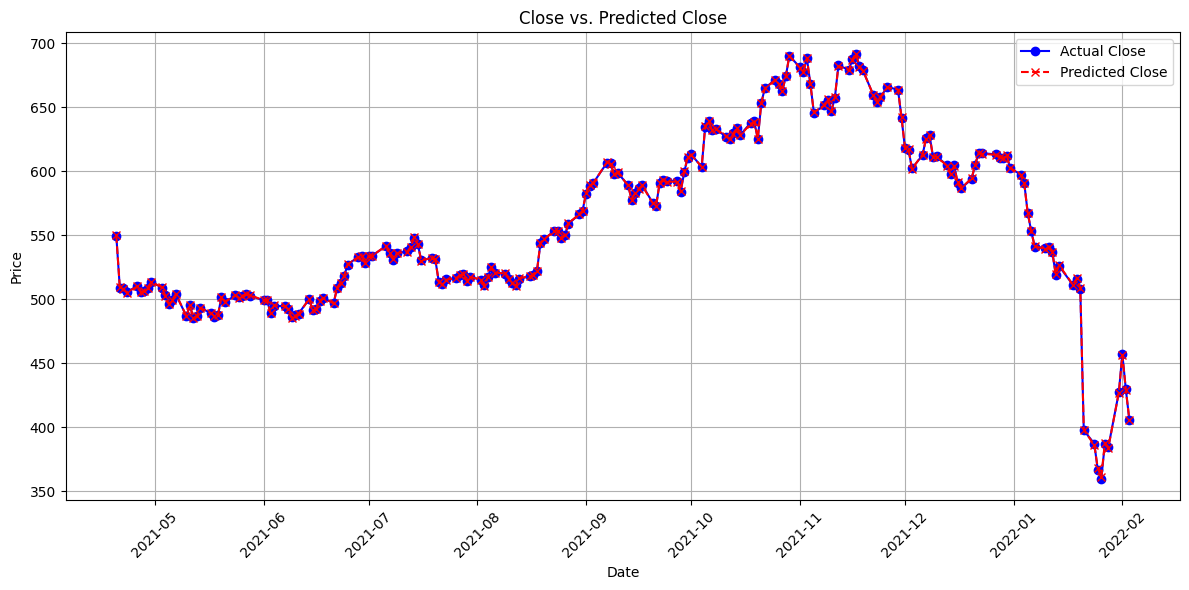

In [39]:
plot_close_vs_prediction_matplotlib(predictions)


# <div style="text-align: center; background-color: white; font-family: Lobster;color: black; padding: 14px; line-height: 1;border-radius:12px"> ARIMA (Time Series) </div>

In [40]:
df = df_model.toPandas()
df.head(5)

,Date,Open,High,Low,Close,Volume,Price_Range,Daily_Change,MA_10,MA_50,RSI,Upper_BB,Lower_BB,Stoch_Osc,Target
0,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,8.120025,-2.019989,261.513331,261.513331,90.808224,274.129918,248.896744,71.964741,250.100006
1,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,17.619995,-16.979981,258.660000,258.660000,42.319075,274.034747,243.285253,-13.719122,249.470001
2,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,19.690002,-4.380005,256.822000,256.822000,41.356924,272.469748,241.174253,2.211785,257.950012
3,2018-02-12,252.139999,259.149994,249.000000,257.950012,8534900,10.149994,5.810013,257.010002,257.010002,55.098114,271.036045,242.983960,55.943323,258.269989
4,2018-02-13,257.290009,261.410004,254.699997,258.269989,6855200,6.710007,0.979980,257.190000,257.190000,55.491639,270.029344,244.350657,57.647675,266.000000


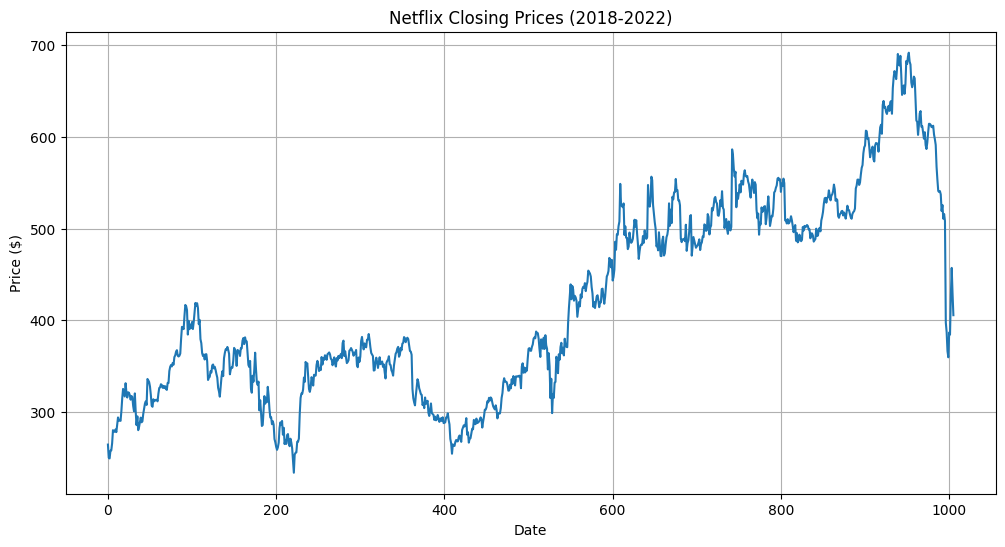

In [41]:
df.sort_index(inplace=True)
ts = df['Close']

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title('Netflix Closing Prices (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid()
plt.show()

### Check Stationarity

In [42]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(trends):
    result = adfuller(trends)
    labels = ['ADF Test Statistic','p-value','#Lags Used','#Observation Used']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')
        
adfuller_test(df['Close'])

ADF Test Statistic: -1.721096110907735
p-value: 0.42027720958706016
#Lags Used: 6
#Observation Used: 999
week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.


Conclusion: The series is non-stationary (p-value > 0.05). Apply differencing.

### First Differencing

In [43]:
df = df.groupby('Date')['Close'].sum().reset_index()
df.Date=pd.to_datetime(df.Date)
df.set_index(['Date'],inplace=True)

df.head()

,Close
Date,
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
2018-02-12,257.950012
2018-02-13,258.269989


ADF Test Statistic: -14.233751636622607
p-value: 1.5802024907931724e-26
#Lags Used: 5
#Observation Used: 999
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


<Axes: xlabel='Date'>

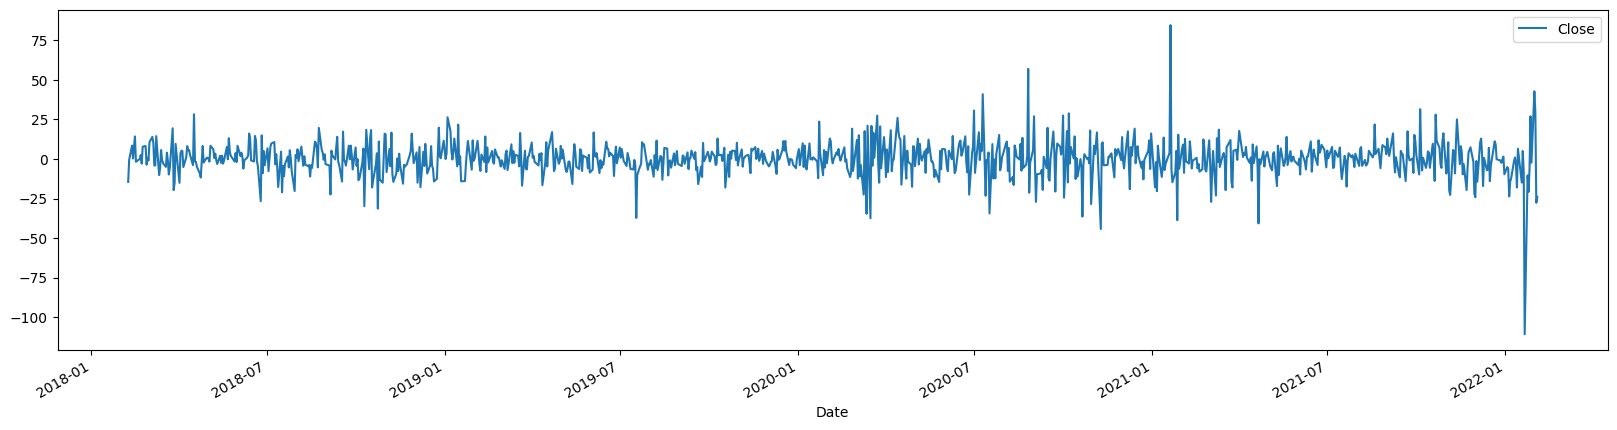

In [44]:
diff1=df-df.shift(1)
diff1=diff1.dropna()
adfuller_test(diff1)
diff1.plot(figsize=(20,5))

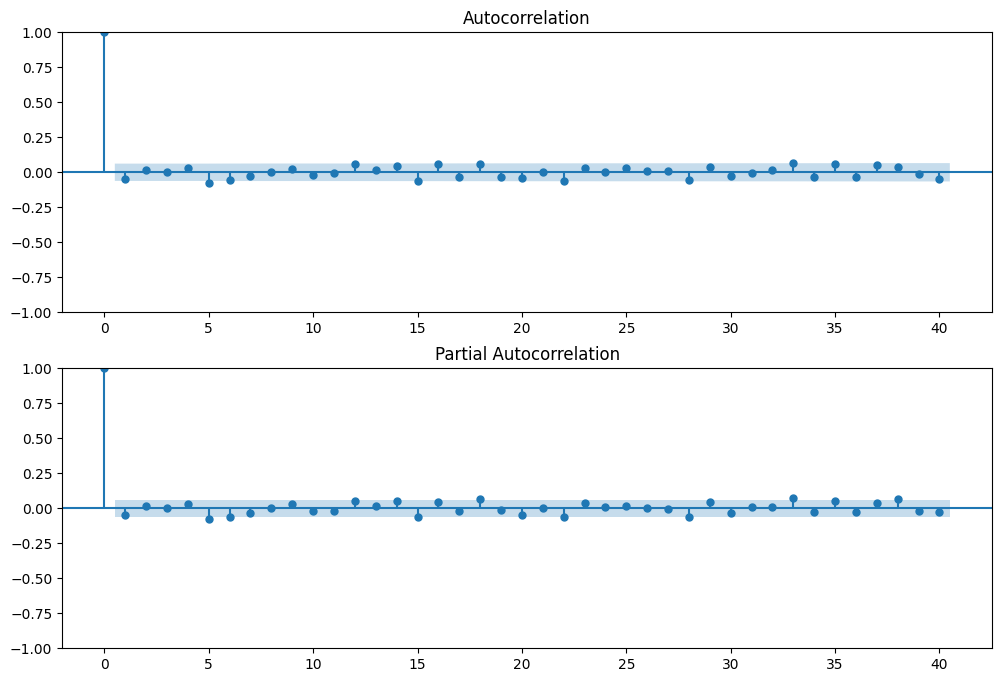

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diff1, lags=40, ax=ax1)
plot_pacf(diff1, lags=40, ax=ax2)
plt.show()

Number of lags for AR -> 7

In [46]:
from statsmodels.tsa.arima.model import ARIMA

for i in range(1,7):
    for j in range(1,7):
        model=ARIMA(df['Close'],order=(i,0,j))
        result=model.fit()
        print(f"AIC :{result.aic}, Order Of AR: {i}, Order of MA:{j} ") 

c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\

AIC :7698.031189297757, Order Of AR: 1, Order of MA:1 
AIC :7699.582462166107, Order Of AR: 1, Order of MA:2 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC :7701.455972331871, Order Of AR: 1, Order of MA:3 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC :7702.480024489385, Order Of AR: 1, Order of MA:4 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC :7697.294161062734, Order Of AR: 1, Order of MA:5 
AIC :7696.9493490221885, Order Of AR: 1, Order of MA:6 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\

AIC :7698.520453275529, Order Of AR: 2, Order of MA:1 
AIC :7701.717446577064, Order Of AR: 2, Order of MA:2 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\

AIC :7703.392082171818, Order Of AR: 2, Order of MA:3 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC :7702.615247310377, Order Of AR: 2, Order of MA:4 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC :7697.047763952155, Order Of AR: 2, Order of MA:5 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC :7698.756180841439, Order Of AR: 2, Order of MA:6 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC :7700.129682407079, Order Of AR: 3, Order of MA:1 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\

AIC :7693.716357672321, Order Of AR: 3, Order of MA:2 
AIC :7703.876791345857, Order Of AR: 3, Order of MA:3 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\

AIC :7700.28198973306, Order Of AR: 3, Order of MA:4 
AIC :7698.660802843804, Order Of AR: 3, Order of MA:5 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC :7700.720655575826, Order Of AR: 3, Order of MA:6 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC :7702.125519186242, Order Of AR: 4, Order of MA:1 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\

AIC :7695.433549368328, Order Of AR: 4, Order of MA:2 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\ts

AIC :7699.113764178968, Order Of AR: 4, Order of MA:3 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\ts

AIC :7703.124204924134, Order Of AR: 4, Order of MA:4 
AIC :7700.641324997343, Order Of AR: 4, Order of MA:5 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\

AIC :7700.205959018364, Order Of AR: 4, Order of MA:6 
AIC :7702.867610943078, Order Of AR: 5, Order of MA:1 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\

AIC :7696.474228572513, Order Of AR: 5, Order of MA:2 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\ts

AIC :7698.842704692626, Order Of AR: 5, Order of MA:3 
AIC :7699.645000151657, Order Of AR: 5, Order of MA:4 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\

AIC :7699.767196925519, Order Of AR: 5, Order of MA:5 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\ts

AIC :7701.052153137018, Order Of AR: 5, Order of MA:6 
AIC :7697.336101142073, Order Of AR: 6, Order of MA:1 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\

AIC :7697.259873589509, Order Of AR: 6, Order of MA:2 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\ts

AIC :7700.731599396097, Order Of AR: 6, Order of MA:3 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\ts

AIC :7702.626654154126, Order Of AR: 6, Order of MA:4 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\ts

AIC :7698.079742500763, Order Of AR: 6, Order of MA:5 
AIC :7704.043822414003, Order Of AR: 6, Order of MA:6 


c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
model=ARIMA(df['Close'],order=(6,1,6))
result=model.fit()
result.summary()

c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\Desktop\Stock-Price-Forecasting-System-Using-Apache-Spark\venv\lib\

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1006
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3827.325
Date:                Sat, 01 Mar 2025   AIC                           7680.650
Time:                        20:06:44   BIC                           7744.515
Sample:                             0   HQIC                          7704.917
                               - 1006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2079      0.090      2.310      0.021       0.032       0.384
ar.L2          0.6436      0.080      8.044      0.000       0.487       0.800
ar.L3         -1.0979      0.096    -11.433      0.000      -1.286      -0.910
ar.L4          0.5158      0.085      6.044      0.000       0.349       0.683
ar.L5          0.2597      0.073      3.558      0.000       0.117       0.403
ar.L6         -0.8318      0.086     -9.659      0.000      -1.001      -0.663
ma.L1         -0.2501      0.101     -2.473      0.013      -0.448      -0.052
ma.L2         -0.6069      0.086     -7.095      0.000      -0.775      -0.439
ma.L3          1.1343      0.097     11.682      0.000       0.944       1.325
ma.L4         -0.5587      0.090     -6.227      0.000      -0.735      -0.383
ma.L5         -0.2897      0.082     -3.533      0.000      -0.450      -0.129
ma.L6          0.7999      0.095      8.391      0.000       0.613       0.987
sigma2       119.7739      2.411     49.684      0.000     115.049     124.499
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              9485.75
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.18   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

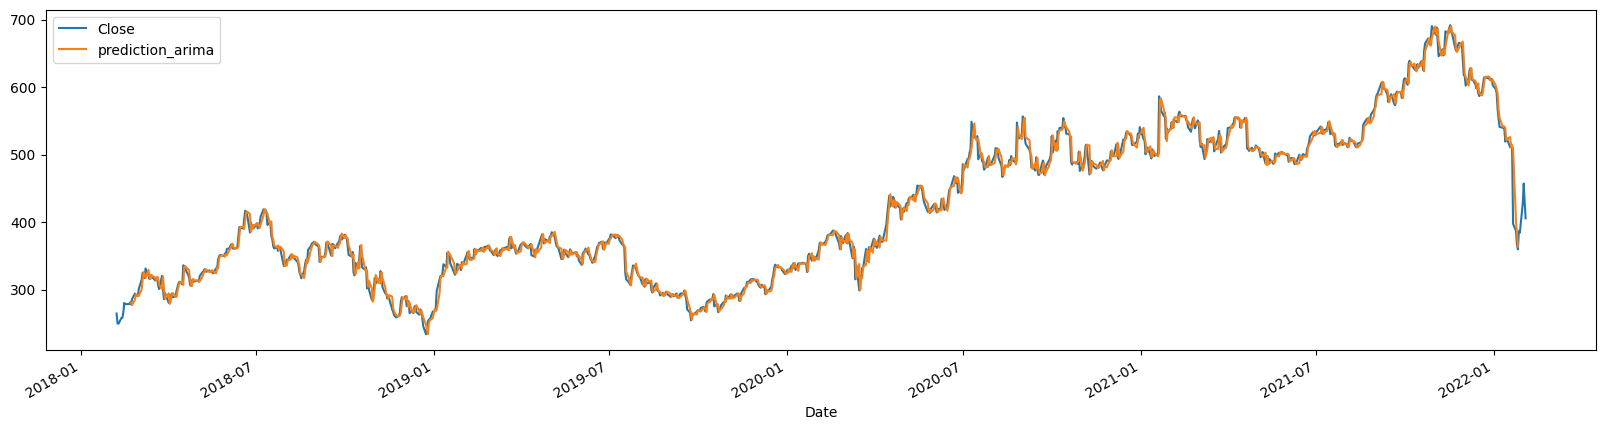

In [48]:
df['prediction_arima']=result.predict(start=10,end=999)
df[["Close","prediction_arima"]].plot(figsize=(20,5))

# <div style="text-align: center; background-color: white; font-family: Lobster;color: black; padding: 14px; line-height: 1;border-radius:12px"> LSTM (Long-Short Term Memory) </div>